In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [214]:
data = pd.read_csv("../data/train_walmart.csv")
w_test_data = pd.read_csv("../data/test_walmart.csv")

## 初步了解数据

In [215]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


+ TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.  
+ VisitNumber - an id corresponding to a single trip by a single customer
+ Weekday - the weekday of the trip
+ Upc - the UPC number of the product purchased
+ ScanCount - the number of the given item that was purchased. A negative value indicates a product return
+ DepartmentDescription - a high-level description of the item's department
+ FinelineNumber - a more refined category for each of the products, created by Walmart

In [216]:
data.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

+ 总共647054行
+ Upc (~4000 缺失)
+ Fineline Number和Upc一样
+ Department Description (~1500 缺失)

4000占总数比例非常少,可以丢弃?

In [217]:
data.TripType.unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14,  12], dtype=int64)

In [218]:
len(data.TripType.unique())

38

38种trip,可能999代表特殊含义?

In [219]:
len(data.VisitNumber.unique())

95674

In [220]:
data.VisitNumber.max()

191347

In [221]:
data.VisitNumber.min()

5

95674 visit

In [222]:
data.Weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [223]:
data.Upc.unique()

array([  6.81131529e+10,   6.05388160e+10,   7.41081110e+09, ...,
         8.85306278e+10,   8.87439527e+10,   5.44000008e+09])

In [224]:
data.Upc.min()

834.0

In [225]:
data.Upc.max()

978970666419.0

In [226]:
data.ScanCount.unique()

array([ -1,   1,   2,   3,   5,   6,   4,  14,  -2,   9,   7,  10,   8,
        -3,  -5,  11,  16,  -4,  13,  15,  30,  -6,  12,  20, -12,  19,
        46,  23,  -7,  22,  25,  24,  31,  -9,  51,  17,  18,  71, -10], dtype=int64)

基本正常,负数是退货.有个很大的值,71异常?

In [227]:
data.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

In [228]:
len(data.DepartmentDescription.unique())

69

In [229]:
len(data.FinelineNumber.unique())

5196

In [230]:
data.FinelineNumber.max()

9998.0

In [231]:
data.FinelineNumber.min()

0.0

0有什么意义没有？

In [232]:
data[data.FinelineNumber == 0].count()

TripType                 3837
VisitNumber              3837
Weekday                  3837
Upc                      3837
ScanCount                3837
DepartmentDescription    3837
FinelineNumber           3837
dtype: int64

In [233]:
fineline_is_zero = data[data.FinelineNumber == 0]

In [234]:
fineline_is_zero[fineline_is_zero.ScanCount == 1].count()  

TripType                 3743
VisitNumber              3743
Weekday                  3743
Upc                      3743
ScanCount                3743
DepartmentDescription    3743
FinelineNumber           3743
dtype: int64

In [235]:
fineline_is_zero[fineline_is_zero.ScanCount == -1].count()  

TripType                 53
VisitNumber              53
Weekday                  53
Upc                      53
ScanCount                53
DepartmentDescription    53
FinelineNumber           53
dtype: int64

## 清洗数据

In [236]:
data = data.dropna()

In [237]:
data.count()

TripType                 642925
VisitNumber              642925
Weekday                  642925
Upc                      642925
ScanCount                642925
DepartmentDescription    642925
FinelineNumber           642925
dtype: int64

In [238]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [239]:
le=LabelEncoder()
data['Weekday']=le.fit_transform(data['Weekday'])

In [240]:
pd.get_dummies(data,columns=['Weekday'])

,TripType,VisitNumber,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,999,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,1,0,0,0,0,0,0
1,30,7,6.053882e+10,1,SHOES,8931.0,1,0,0,0,0,0,0
2,30,7,7.410811e+09,1,PERSONAL CARE,4504.0,1,0,0,0,0,0,0
3,26,8,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,1,0,0,0,0,0,0
4,26,8,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,1,0,0,0,0,0,0
5,26,8,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0,1,0,0,0,0,0,0
6,26,8,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0,1,0,0,0,0,0,0
7,26,8,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0,1,0,0,0,0,0,0
8,26,8,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0,1,0,0,0,0,0,0
9,26,8,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0,1,0,0,0,0,0,0


In [241]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,0,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,0,6.053882e+10,1,SHOES,8931.0
2,30,7,0,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,0,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,0,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


+ 接下来可以看看每类trip买的东西
+ Upc有无用处？
+ department, fineline可能更有用
+ 退货

## 数据分析

In [242]:
x = data.TripType.unique()
np.sort(x)

array([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999], dtype=int64)

看看不同类型trip的分布

In [243]:
data_triptypes = data.drop_duplicates("VisitNumber")

In [244]:
x = data_triptypes["TripType"]
x = x.value_counts()

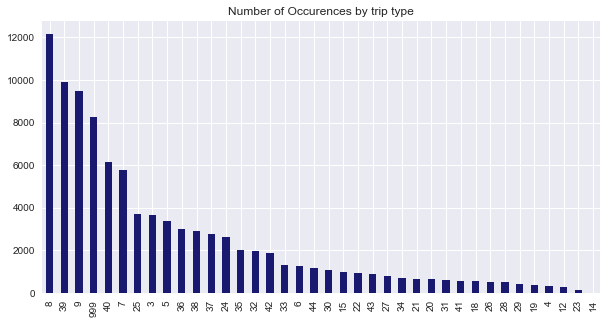

In [245]:
graph = x.plot(kind="bar", figsize=(10, 5), color="midnightblue")
graph.set_title("Number of Occurences by trip type")


少数几种trip占了大多数

trip可能与以下有关：
- 买的东西
- 星期几
- 退货与购物

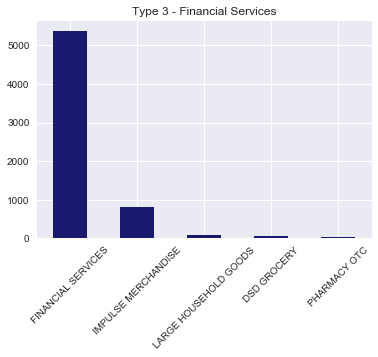

In [248]:
type_3 = data[data.TripType == 3]
type_3_items = type_3[["TripType","DepartmentDescription"]]
type_3_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                        title="Type 3 - Financial Services", color="midnightblue")

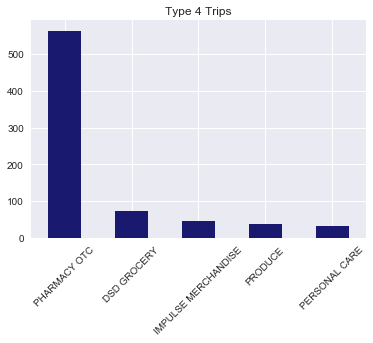

In [139]:
type_4 = data[data.TripType == 4]
type_4_items = type_4[["TripType","DepartmentDescription"]]
type_4_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, title="Type 4 Trips", color="midnightblue")

买药？

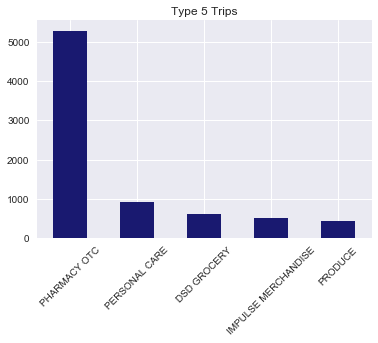

In [140]:
type_5 = data[data.TripType == 5]
type_5_items = type_5[["TripType","DepartmentDescription"]]
type_5_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 5 Trips", color="midnightblue")

5和4一样？ 可能还有其他的feature，比如周几买？买的数量等等？

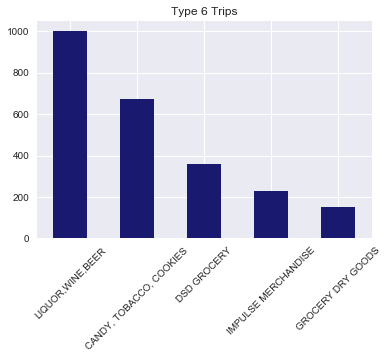

In [141]:
type_6 = data[data.TripType == 6]
type_6_items = type_6[["TripType","DepartmentDescription"]]
type_6_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 6 Trips", color="midnightblue")

喝酒，抽烟？

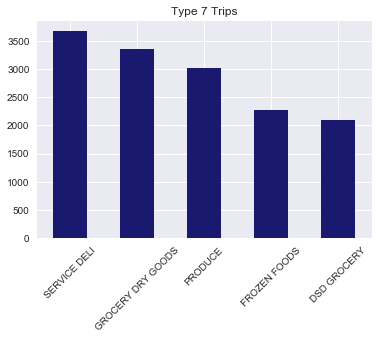

In [142]:
type_7 = data[data.TripType == 7]
type_7_items = type_7[["TripType","DepartmentDescription"]]
type_7_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 7 Trips", color="midnightblue")

主妇？杂货？

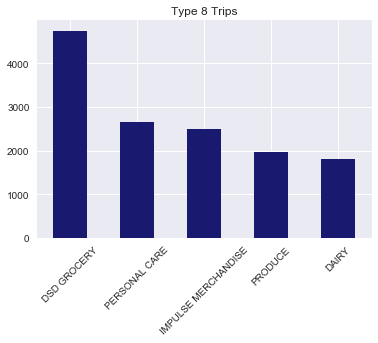

In [143]:
type_8 = data[data.TripType == 8]
type_8_items = type_8[["TripType","DepartmentDescription"]]
type_8_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 8 Trips", color="midnightblue")

最多的trip. grocery，个人洗护？impulse merchandise

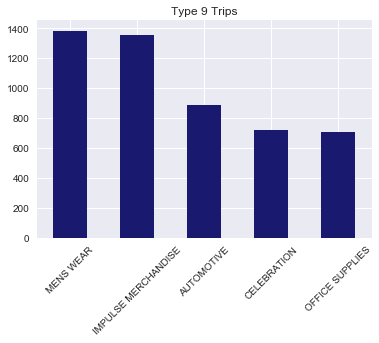

In [144]:
type_9 = data[data.TripType == 9]
type_9_items = type_9[["TripType","DepartmentDescription"]]
type_9_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 9 Trips", color="midnightblue")

男士之旅？

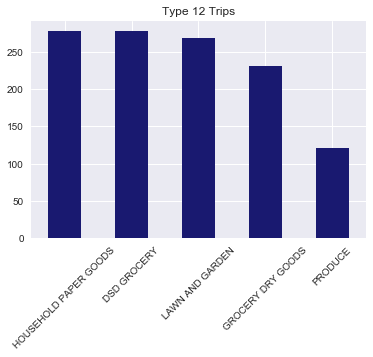

In [145]:
type_12 = data[data.TripType == 12]
type_12_items = type_12[["TripType","DepartmentDescription"]]
type_12_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 12 Trips", color="midnightblue")

随机？好像什么都有

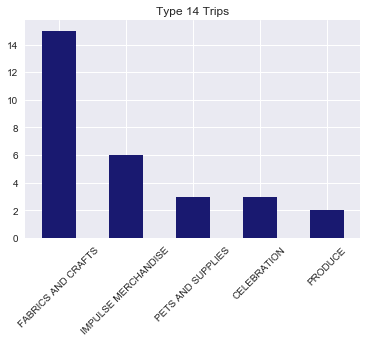

In [146]:
type_14 = data[data.TripType == 14]
type_14_items = type_14[["TripType","DepartmentDescription"]]
type_14_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 14 Trips", color="midnightblue")

fabrics and crafts trip

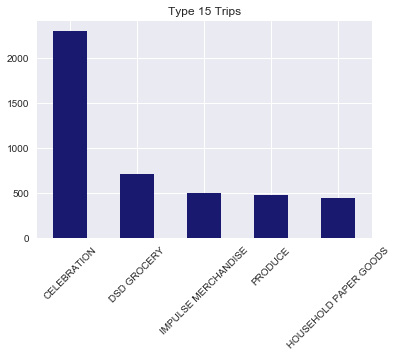

In [147]:
type_15 = data[data.TripType == 15]
type_15_items = type_15[["TripType","DepartmentDescription"]]
x = type_15_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 15 Trips", color="midnightblue")

庆祝!

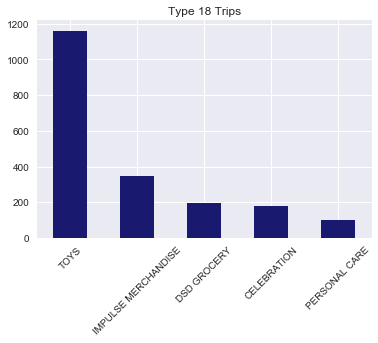

In [148]:
type_18 = data[data.TripType == 18]
type_18_items = type_18[["TripType","DepartmentDescription"]]
type_18_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 18 Trips", color="midnightblue")
plt.ylabel=('Items Purchased')

TOYS

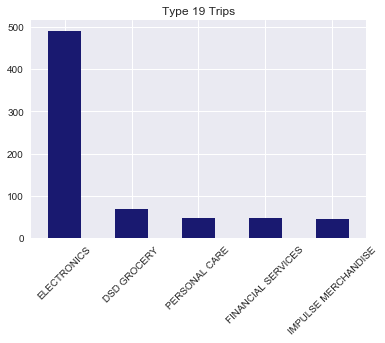

In [149]:
type_19 = data[data.TripType == 19]
type_19_items = type_19[["TripType","DepartmentDescription"]]
x = type_19_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 19 Trips", color="midnightblue")

Electronics

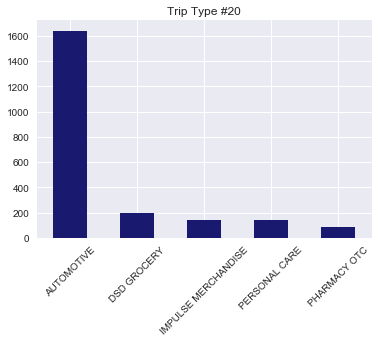

In [150]:
type_20 = data[data.TripType == 20]
type_20_items = type_20[["TripType","DepartmentDescription"]]
x = type_20_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Trip Type #20", color="midnightblue")


Automotive!

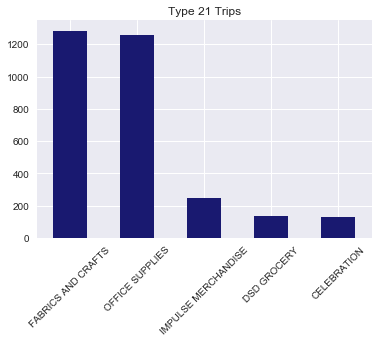

In [151]:
type_21 = data[data.TripType == 21]
type_21_items = type_21[["TripType","DepartmentDescription"]]
x = type_21_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 21 Trips", color="midnightblue")

Office supplies + fabrics/crafts

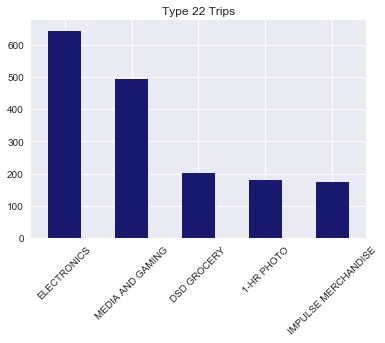

In [152]:
type_22 = data[data.TripType == 22]
type_22_items = type_22[["TripType","DepartmentDescription"]]
x = type_22_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 22 Trips", color="midnightblue")

Electronics + media and gaming

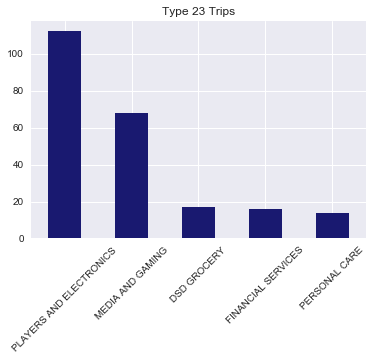

In [153]:
type_23 = data[data.TripType == 23]
type_23_items = type_23[["TripType","DepartmentDescription"]]
x = type_23_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 23 Trips", color="midnightblue")

players and electronics + media/gaming

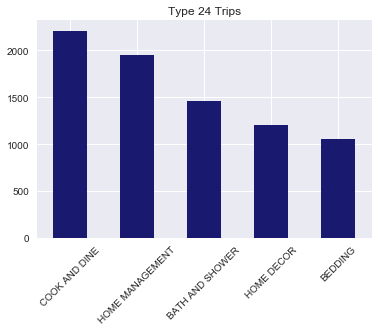

In [154]:
type_24 = data[data.TripType == 24]
type_24_items = type_24[["TripType","DepartmentDescription"]]
x = type_24_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 24 Trips", color="midnightblue")

Cook and dine 

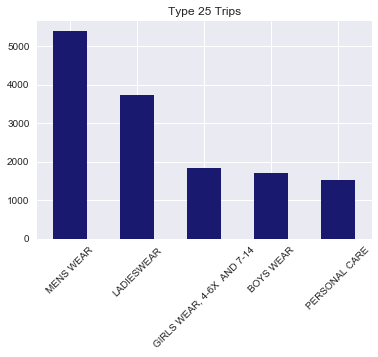

In [155]:
type_25 = data[data.TripType == 25]
type_25_items = type_25[["TripType","DepartmentDescription"]]
x = type_25_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 25 Trips", color="midnightblue")

男士?

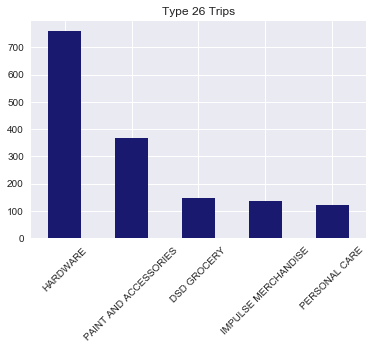

In [156]:
type_26 = data[data.TripType == 26]
type_26_items = type_26[["TripType","DepartmentDescription"]]
x = type_26_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 26 Trips", color="midnightblue")

hardware trip 

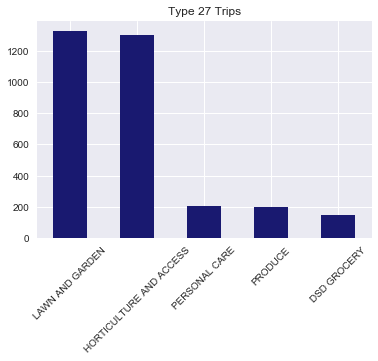

In [157]:
type_27 = data[data.TripType == 27]
type_27_items = type_27[["TripType","DepartmentDescription"]]
x = type_27_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 27 Trips", color="midnightblue")

lawn and garden + horticulture

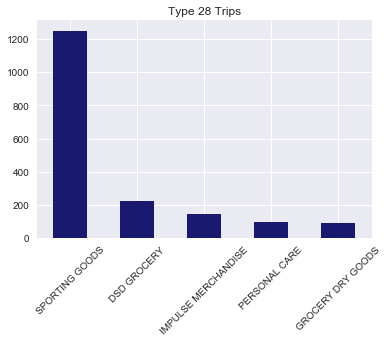

In [158]:
type_28 = data[data.TripType == 28]
type_28_items = type_28[["TripType","DepartmentDescription"]]
x = type_28_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 28 Trips", color="midnightblue")

sporting

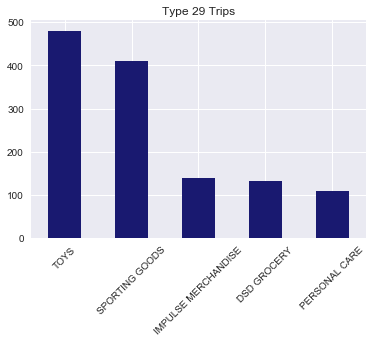

In [159]:
type_29 = data[data.TripType == 29]
type_29_items = type_29[["TripType","DepartmentDescription"]]
x = type_29_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 29 Trips", color="midnightblue")

Toys and sporting goods! 儿童？

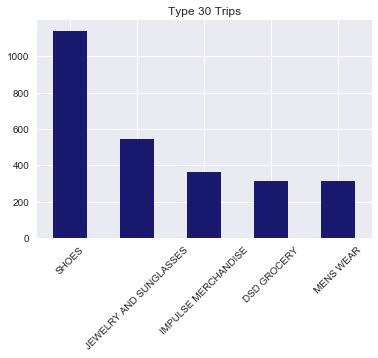

In [160]:
type_30 = data[data.TripType == 30]
type_30_items = type_30[["TripType","DepartmentDescription"]]
x = type_30_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 30 Trips", color="midnightblue")

Shoe , jewelry,女士？

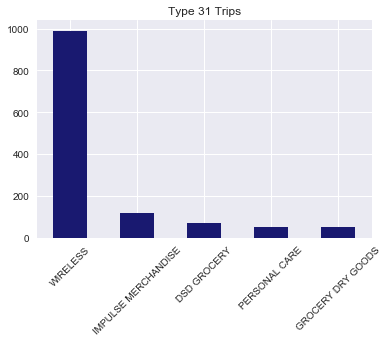

In [161]:
type_31 = data[data.TripType == 31]
type_31_items = type_31[["TripType","DepartmentDescription"]]
x = type_31_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 31 Trips", color="midnightblue")

手机？

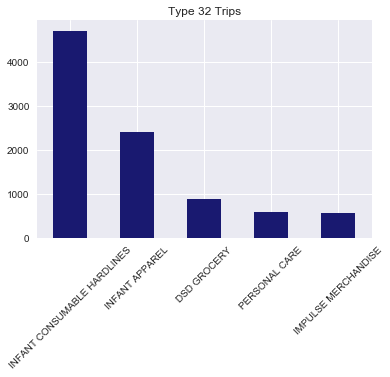

In [162]:
type_32 = data[data.TripType == 32]
type_32_items = type_32[["TripType","DepartmentDescription"]]
x = type_32_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 32 Trips", color="midnightblue")

婴儿

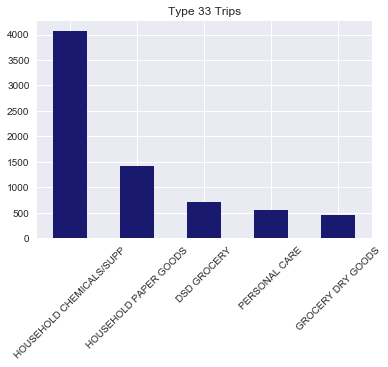

In [163]:
type_33 = data[data.TripType == 33]
type_33_items = type_33[["TripType","DepartmentDescription"]]
x = type_33_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 33 Trips", color="midnightblue")

household chemical supplies + paper goods

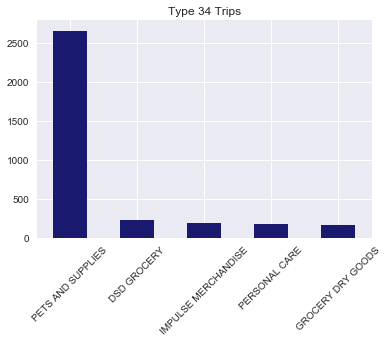

In [164]:
type_34 = data[data.TripType == 34]
type_34_items = type_34[["TripType","DepartmentDescription"]]
x = type_34_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 34 Trips", color="midnightblue")

Pet trip!

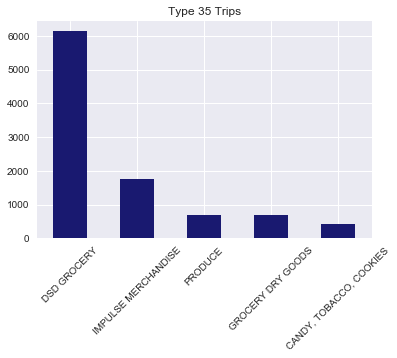

In [165]:
type_35 = data[data.TripType == 35]
type_35_items = type_35[["TripType","DepartmentDescription"]]
x = type_35_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 35 Trips", color="midnightblue")

DSD Groceries (Direct store deliery) 

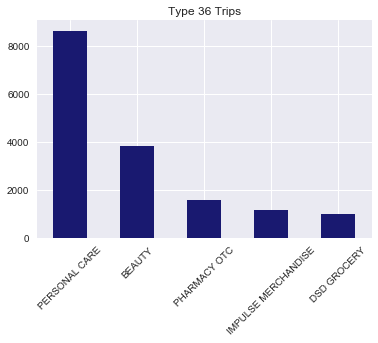

In [166]:
type_36 = data[data.TripType == 36]
type_36_items = type_36[["TripType","DepartmentDescription"]]
x = type_36_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 36 Trips", color="midnightblue")

personal care + beauty

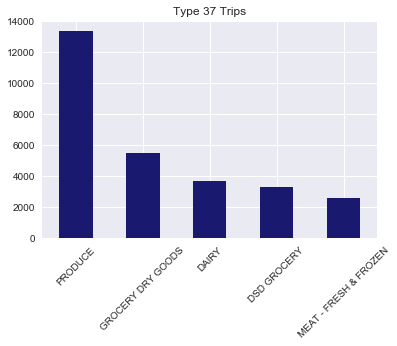

In [167]:
type_37 = data[data.TripType == 37]
type_37_items = type_37[["TripType","DepartmentDescription"]]
x = type_37_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 37 Trips", color="midnightblue")

Produce trips

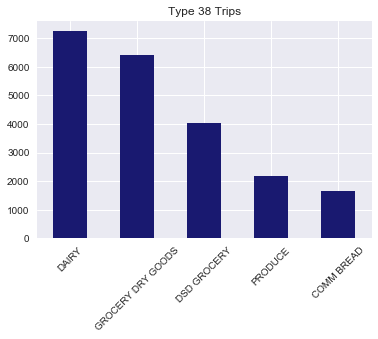

In [168]:
type_38 = data[data.TripType == 38]
type_38_items = type_38[["TripType","DepartmentDescription"]]
x = type_38_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 38 Trips", color="midnightblue")

日用？

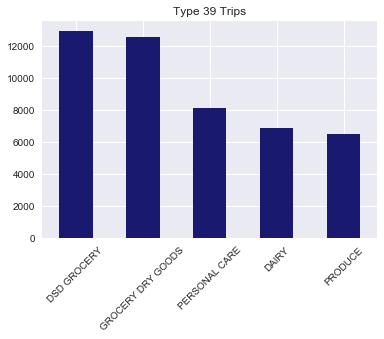

In [169]:
type_39 = data[data.TripType == 39]
type_39_items = type_39[["TripType","DepartmentDescription"]]
x = type_39_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 39 Trips", color="midnightblue")

grocery trip 

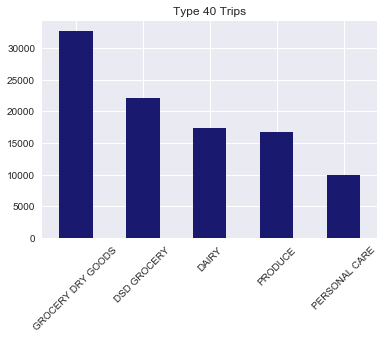

In [170]:
type_40 = data[data.TripType == 40]
type_40_items = type_40[["TripType","DepartmentDescription"]]
x = type_40_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 40 Trips", color="midnightblue")

grocery trip 

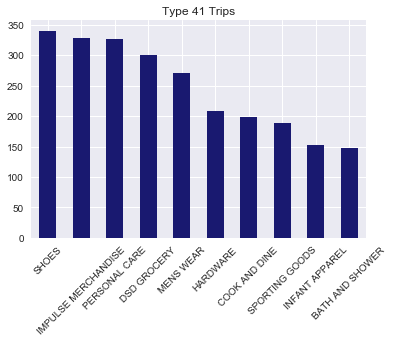

In [171]:
type_41 = data[data.TripType == 41]
type_41_items = type_41[["TripType","DepartmentDescription"]]
x = type_41_items.DepartmentDescription.value_counts().head(10).plot(kind="bar", rot=45, 
                                                              title="Type 41 Trips", color="midnightblue")

???

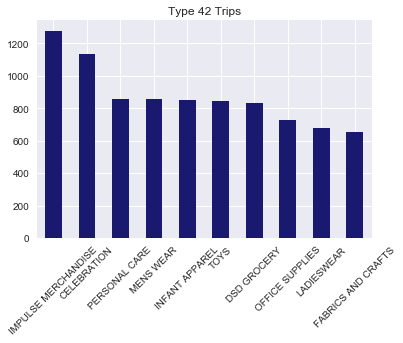

In [172]:
type_42 = data[data.TripType == 42]
type_42_items = type_42[["TripType","DepartmentDescription"]]
x = type_42_items.DepartmentDescription.value_counts().head(10).plot(kind="bar", rot=45, 
                                                              title="Type 42 Trips", color="midnightblue")

???

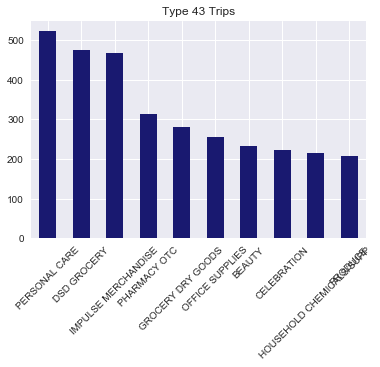

In [173]:
type_43 = data[data.TripType == 43]
type_43_items = type_43[["TripType","DepartmentDescription"]]
x = type_43_items.DepartmentDescription.value_counts().head(10).plot(kind="bar", rot=45, 
                                                              title="Type 43 Trips", color="midnightblue")

?

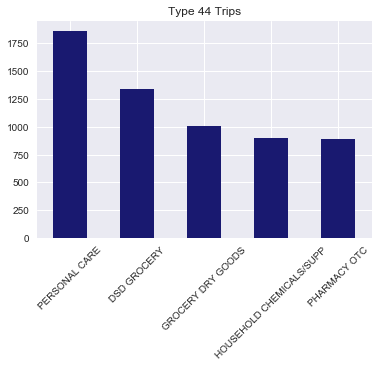

In [174]:
type_44 = data[data.TripType == 44]
type_44_items = type_44[["TripType","DepartmentDescription"]]
x = type_44_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 44 Trips", color="midnightblue")

?


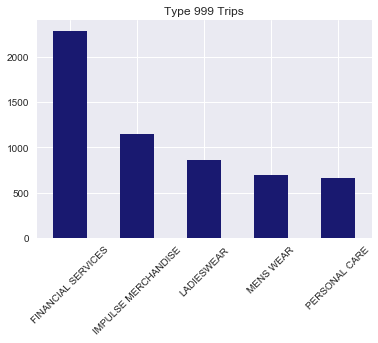

In [175]:
type_999 = data[data.TripType == 999]
type_999_items = type_999[["TripType","DepartmentDescription"]]
x = type_999_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 999 Trips", color="midnightblue")

999好像和financial 有关?

In [176]:
def feature_transform(data):
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies
    data['Weekday']=le.fit_transform(data['Weekday'])
    
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    
    data = data.rename(columns={"ScanCount":"NumItems"})
    
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    data['TripType']= le.fit_transform(data['TripType'])
    
    return data

In [177]:
def test_feature_transform(data):
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies
    data['Weekday']=le.fit_transform(data['Weekday'])
    
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    
    data = data.rename(columns={"ScanCount":"NumItems"})
    
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    
    return data

In [178]:
data = feature_transform(data)

In [179]:
test=test_feature_transform(w_test_data)

In [180]:
print(w_test_data.columns)

Index(['VisitNumber', 'Weekday', 'Upc', 'ScanCount', 'DepartmentDescription',
       'FinelineNumber', '1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY',
       'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES',
       'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES',
       'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD',
       'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR', 'HOME MANAGEMENT',
       'HORTICULTURE AND ACCESS', 'HOUSEHOLD CHEMICALS/SUPP',
       'HOUSEHOLD PAPER GOODS', 'IMPULSE MERCHANDISE', 'INFANT APPAREL',
       'INFANT CONSUMABLE HARDLINES', 'JEWELRY AND SUNGLASSES', 'LADIES SOCKS',
       'LADIESWEAR', 'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN',
       'LIQUOR,WINE,BEER', 'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',
       'MENS WEAR', 'MEN

In [181]:
def add_category_counts(data,start_col):
    alist = []
    for array in np.asarray(data.iloc[:,start_col:]):
        count = 0
        for item in array:
            if item > 0:
                count += 1
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(start_col, 'CategoryCounts', cat_counts)
    return data


In [182]:
data = add_category_counts(data,4)

In [183]:
data.head()

,TripType,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,0,-1,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,0,2,0.0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,18,0,27,1.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
test = add_category_counts(test,3)
test.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,0,4,0.0,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,4,0.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 模型

In [185]:
features = ["Weekday", "NumItems", "Return", 'CategoryCounts', 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']

### logistical regression

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [187]:
mytrain, mytest = train_test_split(data, test_size = .3)

In [188]:
lr = LogisticRegression()
lr.fit(X = np.asarray(mytrain[features]), y = np.asarray(mytrain.TripType))

predictions = lr.predict_proba(np.asarray(mytest[features]))
predictions_notproba = lr.predict(np.asarray(mytest[features]))

print("Log loss Percentage: {}".format(log_loss(mytest.TripType, predictions).round(5)))

print("Accuracy Score: {}".format(accuracy_score(mytest.TripType, predictions_notproba)))

Log loss Percentage: 1.24239
Accuracy Score: 0.6482758620689655


### Randomforest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
forest = RandomForestClassifier(n_estimators = 300, max_features=2)

In [191]:
forest = forest.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [192]:
predictions = forest.predict_proba(np.asarray(mytest[features]))
predictions_notproba = forest.predict(np.asarray(mytest[features]))
print("Log loss Score: {}".format(log_loss(mytest.TripType, predictions).round(5)))
print("Accuracy Score: {}".format(accuracy_score(mytest.TripType, predictions_notproba)))

Log loss Score: 1.35893
Accuracy Score: 0.6651458885941645


### Naive Bayes

In [193]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB #multinomial要求feature>0

In [194]:
bnb = BernoulliNB()
bnb = bnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [195]:
predictions = bnb.predict_proba(np.asarray(mytest[features]))
print("Log loss Score: {}".format(log_loss(mytest.TripType, predictions).round(5)))

Log loss Score: 1.40189


## 结果分析

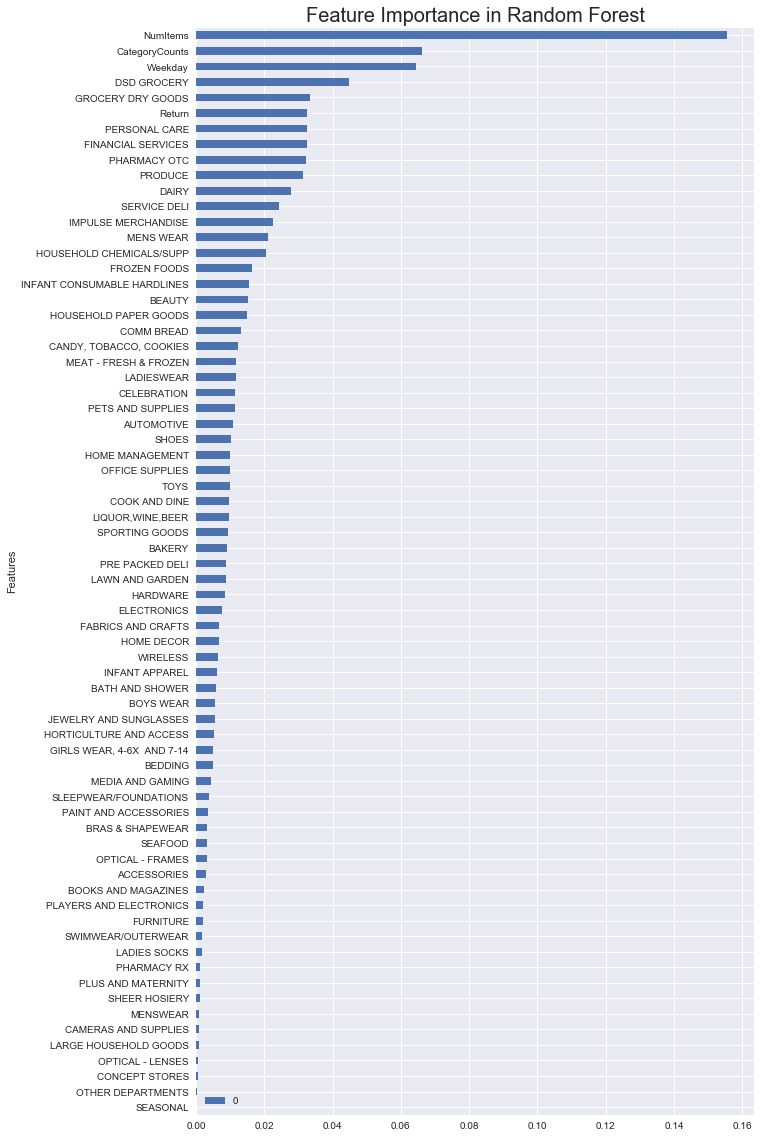

In [196]:
x = forest.feature_importances_
graphing_results = pd.DataFrame(forest.feature_importances_).sort_index()
graphing_results["Features"] = features
graphing_results = graphing_results.set_index("Features").sort_values(by=0, ascending=True)
y = graphing_results.plot(kind="barh", figsize=(10,20), rot=0)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title("Feature Importance in Random Forest", size=20)